In [10]:
%matplotlib inline

import numpy as np
from mediapipe.framework.formats import landmark_pb2
from matplotlib import image as mp_image
from matplotlib import pyplot as plt
from IPython.display import Image
import os

In [2]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

### Inria Dataset With 1 Person

In [ ]:
def write_single_image_inria_dataset(labels=False):
    dire = '/home/rdr2143/adversarial-yolo/inria/Train/pos/yolo-labels/'
    files = os.listdir(dire)
    values = []
    
    type_ = "images"
    to_copy_from_dir = "/home/rdr2143/adversarial-yolo/inria/Train/pos/"
    if labels:
        type_ = "labels"
        to_copy_from_dir = "/home/rdr2143/adversarial-yolo/inria/Train/pos/yolo-labels/"

    for each in files:
        f = open(dire+each, 'r')
        people_n = 0
        for line in f.readlines():
            cls = int(line.split(" ")[0])
            if cls == 0:
                people_n += 1
        if people_n == 1:
            to_write_file = each
            if not labels:
                to_write_file = to_write_file.replace(".txt", ".png")
            values.append(to_copy_from_dir+to_write_file)
    print(type_, to_copy_from_dir, values[:2])
    with open("/home/rdr2143/inria-single-failed-"+type_+".txt", "w") as txt_file:
        for line in values:
            txt_file.write(line+'\n')


In [ ]:
write_single_image_inria_dataset(labels=False)
write_single_image_inria_dataset(labels=True)

In [43]:
SCALE = 3
d = '/home/rdr2143/inria-adv-dataset/single-failed-v2'
IMAGE_FILES = [os.path.join(d, path.replace('\n', '')) for path in os.listdir(d)]
BG_COLOR = (192, 192, 192) # gray
labels_for_image = []
with mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    min_detection_confidence=0.5) as pose:
  for idx, file in enumerate(IMAGE_FILES):
    if (not(".jpg" in file or ".png" in file)):
        continue
    image = cv2.imread(file)
    image_height, image_width, _ = image.shape
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    if not results.pose_landmarks:
      print(file)
      continue
    
    landmark_subset = landmark_pb2.NormalizedLandmarkList(
        landmark = [
            results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER],
            results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER],
            results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP],
            results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP]
        ]
    )
    
    a = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER]
    b = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER]
    c = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP]
    d = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP]
    
    w1 = abs(b.x - a.x) * image_width
    w2 = abs(c.x - d.x) * image_width
    
    h1 = abs(a.y - c.y) * image_height
    h2 = abs(b.y - d.y) * image_height
    
    all_relevant_points = [a, b, c, d]
    x = [p.x for p in all_relevant_points]
    y = [p.y for p in all_relevant_points]
    x0, y0 = sum(x) / len(all_relevant_points), sum(y) / len(all_relevant_points)
    
    w, h = SCALE*max(w1, w2)/image_width, SCALE*max(h1, h2)/image_height
    img_name = file.split("/")[-1]
    labels_file_name = img_name.replace(".png", "").replace(".jpg", "")+".txt"
    label_file = open('/home/rdr2143/inria-adv-dataset/single-failed-v2/labels/'+labels_file_name, 'w')
    label_file.write(f'0 {x0} {y0} {w} {h} \n')
    label_file.close()

print("Done...")

/home/rdr2143/inria-adv-dataset/single-failed-v2/person_358.png
/home/rdr2143/inria-adv-dataset/single-failed-v2/crop001819.png
/home/rdr2143/inria-adv-dataset/single-failed-v2/person_275.png
/home/rdr2143/inria-adv-dataset/single-failed-v2/person_and_bike_156.png
/home/rdr2143/inria-adv-dataset/single-failed-v2/person_and_bike_005.png
/home/rdr2143/inria-adv-dataset/single-failed-v2/person_and_bike_017.png
/home/rdr2143/inria-adv-dataset/single-failed-v2/person_328.png
/home/rdr2143/inria-adv-dataset/single-failed-v2/crop001687.png
/home/rdr2143/inria-adv-dataset/single-failed-v2/crop001709.png
/home/rdr2143/inria-adv-dataset/single-failed-v2/crop001831.png
/home/rdr2143/inria-adv-dataset/single-failed-v2/person_060.png
/home/rdr2143/inria-adv-dataset/single-failed-v2/person_and_bike_074.png
/home/rdr2143/inria-adv-dataset/single-failed-v2/crop001014.png
/home/rdr2143/inria-adv-dataset/single-failed-v2/person_106.png
/home/rdr2143/inria-adv-dataset/single-failed-v2/person_and_bike_036

frozenset({(11, 12), (11, 23), (12, 24), (23, 24)})

In [34]:
print(mp_pose.PoseLandmark.LEFT_SHOULDER.value, mp_pose.PoseLandmark.RIGHT_SHOULDER.value, 
      mp_pose.PoseLandmark.LEFT_HIP.value, mp_pose.PoseLandmark.RIGHT_HIP.value)

11 12 23 24


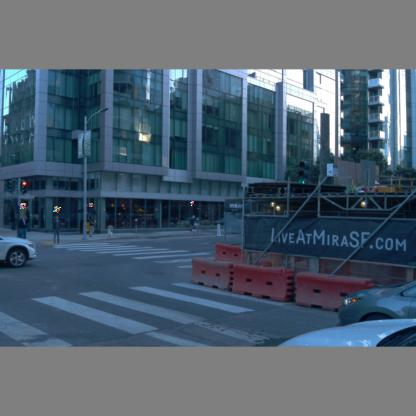

In [1]:
from IPython.display import Image as IpythonImage
IpythonImage(filename='/home/rdr2143/waymo-adv-dataset/adv/patched/99_patched_img.jpg') 

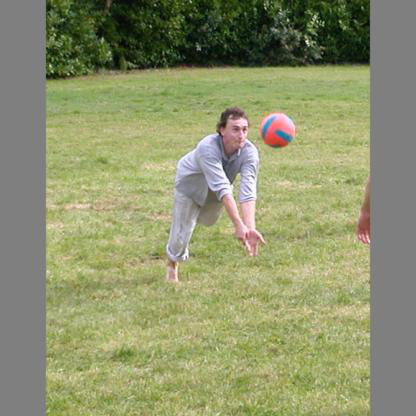

In [36]:
from PIL import Image

data = Image.open('/home/rdr2143/inria-adv-dataset/single-failed/198_og_img.jpg')
# patch_data = Image.open("/home/rdr2143/adversarial-yolo/patches/class_detection.png")
data

In [20]:
data.paste(patch_data, (0, 0))

In [22]:
#     annotated_image = image.copy()
#     # Draw segmentation on the image.
#     # To improve segmentation around boundaries, consider applying a joint
#     # bilateral filter to "results.segmentation_mask" with "image".
#     condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
#     bg_image = np.zeros(image.shape, dtype=np.uint8)
#     bg_image[:] = BG_COLOR
#     annotated_image = np.where(condition, annotated_image, bg_image)
#     # Draw pose landmarks on the image.
#     mp_drawing.draw_landmarks(
#         annotated_image,
#         landmark_subset,
#         frozenset({(0, 2), (1, 3), (0, 1), (2, 3)}),
#         landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
#     cv2.imwrite('annotated_image' + str(idx) + '.png', annotated_image)
#     # Plot pose world landmarks.
#     mp_drawing.plot_landmarks(
#         results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

array([[[129, 127, 126],
        [129, 127, 126],
        [127, 127, 127],
        ...,
        [127, 126, 128],
        [129, 127, 127],
        [129, 127, 127]],

       [[129, 127, 126],
        [129, 127, 126],
        [127, 127, 127],
        ...,
        [127, 126, 128],
        [129, 127, 127],
        [129, 127, 127]],

       [[129, 127, 126],
        [129, 127, 126],
        [127, 127, 127],
        ...,
        [127, 126, 128],
        [129, 127, 127],
        [129, 127, 127]],

       ...,

       [[125, 127, 127],
        [125, 127, 127],
        [127, 128, 126],
        ...,
        [125, 127, 127],
        [129, 126, 128],
        [129, 126, 128]],

       [[125, 127, 127],
        [125, 127, 127],
        [127, 128, 126],
        ...,
        [125, 127, 127],
        [129, 126, 128],
        [129, 126, 128]],

       [[125, 127, 127],
        [125, 127, 127],
        [127, 128, 126],
        ...,
        [125, 127, 127],
        [129, 126, 128],
        [129, 126, 128]]

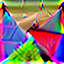

In [22]:
patch_data.resize((64, 64))

In [49]:
import cv2
l_img = cv2.imread('/home/rdr2143/waymo-adv-dataset/train/training_img_292.jpg')
s_img = cv2.imread("/home/rdr2143/adversarial-yolo/patches/class_detection.png", -1)
x_offset=y_offset=50
# l_img[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1], :] = s_img

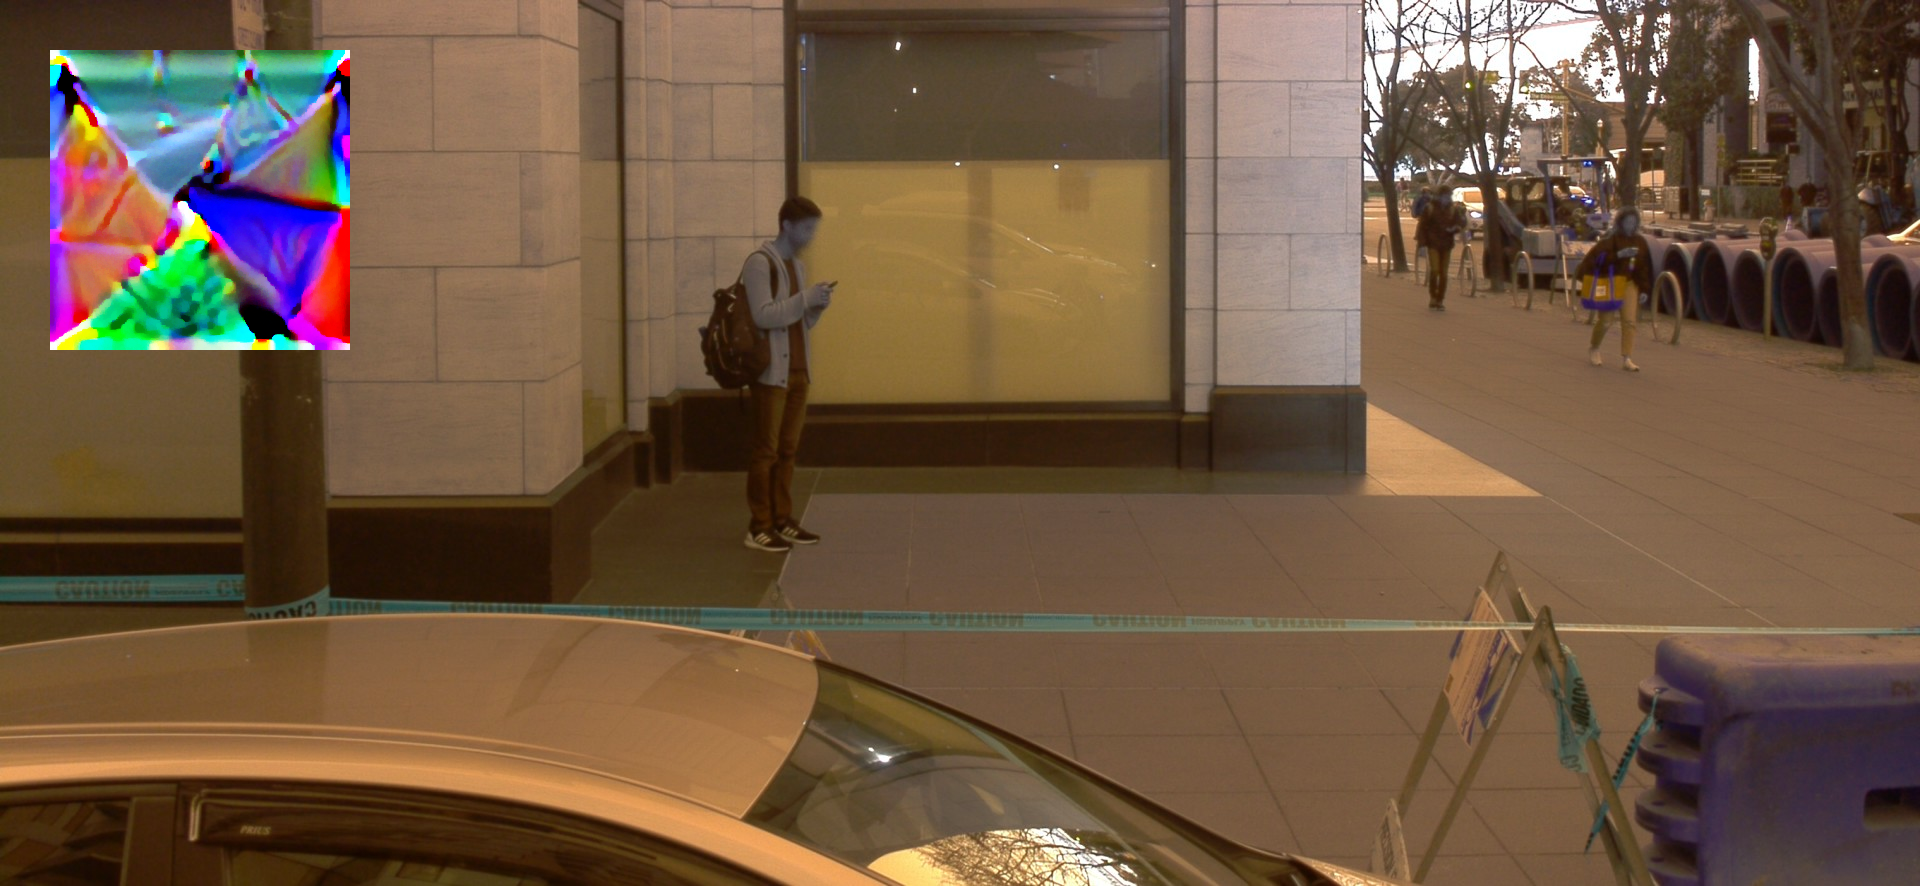

In [45]:
Image.fromarray(l_img)

In [50]:
y1, y2 = y_offset, y_offset + s_img.shape[0]
x1, x2 = x_offset, x_offset + s_img.shape[1]

alpha_s = s_img[:, :, 3] / 255.0
alpha_l = 1.0 - alpha_s

for c in range(0, 3):
    l_img[y1:y2, x1:x2, c] = (alpha_s * s_img[:, :, c] +
                              alpha_l * l_img[y1:y2, x1:x2, c])

IndexError: index 3 is out of bounds for axis 2 with size 3

In [76]:
fig = plt.figure(figsize=(13, 20))
l_img = cv2.imread('/home/rdr2143/waymo-adv-dataset/train/training_img_292.jpg')

im1 = fig.figimage(l_img)
fig.savefig('test.png')
# im2 = fig.figimage(s_img, xo=100, yo=100, alpha=.8, origin='lower')

<Figure size 936x1440 with 0 Axes>

['/home/rdr2143/inria-adv-dataset/single-failed/198_og_img.jpg',
 '/home/rdr2143/inria-adv-dataset/single-failed/52_og_img.jpg',
 '/home/rdr2143/inria-adv-dataset/single-failed/256_og_img.jpg',
 '/home/rdr2143/inria-adv-dataset/single-failed/394_og_img.jpg',
 '/home/rdr2143/inria-adv-dataset/single-failed/500_og_img.jpg',
 '/home/rdr2143/inria-adv-dataset/single-failed/176_og_img.jpg',
 '/home/rdr2143/inria-adv-dataset/single-failed/24_og_img.jpg',
 '/home/rdr2143/inria-adv-dataset/single-failed/510_og_img.jpg',
 '/home/rdr2143/inria-adv-dataset/single-failed/238_og_img.jpg',
 '/home/rdr2143/inria-adv-dataset/single-failed/58_og_img.jpg',
 '/home/rdr2143/inria-adv-dataset/single-failed/81_og_img.jpg',
 '/home/rdr2143/inria-adv-dataset/single-failed/labels',
 '/home/rdr2143/inria-adv-dataset/single-failed/265_og_img.jpg',
 '/home/rdr2143/inria-adv-dataset/single-failed/335_og_img.jpg',
 '/home/rdr2143/inria-adv-dataset/single-failed/173_og_img.jpg',
 '/home/rdr2143/inria-adv-dataset/sin